The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


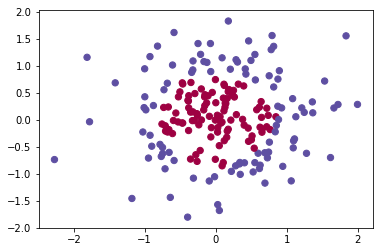

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

# - a numpy-array (matrix) X that contains features (x1, x2)
# - a numpy-array (vector) Y that contains labels (red:0, blue:1)
X, Y = load_planar_dataset()

# # Visualize the data
# plt.scatter(X[0, :], X[1, :], c = Y, s = 40, cmap = plt.cm.Spectral)

shape_X = X.shape
shape_Y = Y.shape
m = shape_X[1]

print ("The shape of X is: " + str(shape_X))
print ("The shape of Y is: " + str(shape_Y))
print ("I have m = %d training examples!" % m)

# # Train the logistic regression classifier
# clf = sklearn.linear_model.LogisticRegressionCV();

# clf.fit(X.T, Y.T.ravel());

# # Plot the decision boundary for logistic regression
# plot_decision_boundary(lambda x: clf.predict(x), X, Y)
# plt.title("Logistic Regression")

# # Print accuracy
# LR_predictions = clf.predict(X.T)
# print ("Accuracy of logistic regression: %d" % float((np.dot(Y, LR_predictions) + np.dot(1-Y, 1-LR_predictions)) / float(Y.size) * 100) + 
#        "% " + "(percentage of correctly labelled datapoints)")

def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    
    return (n_x, n_h, n_y)

# X_assess, Y_assess = layer_sizes_test_case()
# (n_x, n_h, n_y)  = layer_sizes(X_assess, Y_assess)
# print("The size of the input layer is: n_x = " + str(n_x))
# print("The size of the hidden layer is: n_h = " + str(n_h))
# print("The size of the output layer is: n_y = " + str(n_y))

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                W1 -- weight matrix of shape (n_h, n_x)
                b1 -- bias vector of shape (n_h, 1)
                W2 -- weight matrix of shape (n_y, n_h)
                b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2)
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

# n_x, n_h, n_y = initialize_parameters_test_case()
# parameters = initialize_parameters(n_x, n_h, n_y)
# print("W1 = " + str(parameters["W1"]))
# print("b1 = " + str(parameters["b1"]))
# print("W2 = " + str(parameters["W2"]))
# print("b2 = " + str(parameters["b2"]))

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

# X_assess, parameters = forward_propagation_test_case()

# A, cache = forward_propagation(X_assess, parameters)

# print(np.mean(cache['Z1']), np.mean(cache['A1']), np.mean(cache['Z2']), np.mean(cache['A2']))

def compute_cost(A2, Y, parameters):
    """
    Compute the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second avtivation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    
    m = Y.shape[1]
#     # cost 类型为ndarray,无法通过断言
#     logprobs = np.dot(Y, np.log(A2).T) + np.dot(1 - Y, np.log(1 - A2).T)
#     cost = -logprobs / m
    logprobs = np.multiply(Y, np.log(A2)) + np.multiply(1 - Y, np.log(1 - A2))
    cost = -np.sum(logprobs) / m

    cost = np.squeeze(cost)

    assert(isinstance(cost, float))
    
    return cost

# A2, Y_assess, parameters = compute_cost_test_case()

# print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

def backward_propagation(parameters, cache, X, Y):
    """
    Arguments:
    parameters -- python dictionary containing parameters
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, numeber of examples)
    
    Returns -- python dictionary containing gradients with respect to different parameters
    """
    
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis = 1, keepdims = True) / m
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / m
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

# parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

# grads = backward_propagation(parameters, cache, X_assess, Y_assess)
# print ("dW1 = "+ str(grads["dW1"]))
# print ("db1 = "+ str(grads["db1"]))
# print ("dW2 = "+ str(grads["dW2"]))
# print ("db2 = "+ str(grads["db2"]))

def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing parameters W1, b1, W2 and b2
    grads -- python dictionary containing gradients
    
    Returns:
    parameters -- python dictionary containing updated parameters
    """
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1, 
                  "W2": W2,
                  "b2": b2}
    
    return parameters

# parameters, grads = update_parameters_test_case()
# parameters = update_parameters(parameters, grads)

# print("W1 = " + str(parameters["W1"]))
# print("b1 = " + str(parameters["b1"]))
# print("W2 = " + str(parameters["W2"]))
# print("b2 = " + str(parameters["b2"]))

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost = False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        
        cost = compute_cost(A2, Y, parameters)
        
        grads = backward_propagation(parameters, cache, X, Y)
        
        parameters = update_parameters(parameters, grads)
        
        if print_cost and i % 1000 == 0:
            print("Cost after iteration %i: %f" %(i, cost))
        
    return parameters
    

# X_assess, Y_assess = nn_model_test_case()

# parameters = nn_model(X_assess, Y_assess, 4, num_iterations = 10000, print_cost = False)
# print("W1 = " + str(parameters["W1"]))
# print("b1 = " + str(parameters["b1"]))
# print("W2 = " + str(parameters["W2"]))
# print("b2 = " + str(parameters["b2"]))


def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing parameters
    X -- input data of size (n_x, m)
    
    Returns:
    predictions -- vector of predictions of the model (red: 0 / blue: 1)
    """
    
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    
    return predictions
    

# parameters, X_assess = predict_test_case()

# predictions = predict(parameters, X_assess)
# print("predictions mean = " + str(np.mean(predictions)))




# parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost = True)

# plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
# plt.title("Decision Boundary for hidden layer size " + str(4))

# predictions = predict(parameters, X)
# print("Accuracy: %d" % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

# plt.figure(figsize = (16, 32))
# hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
# for i, n_h in enumerate(hidden_layer_sizes):
#     plt.subplot(5, 2, i + 1)
#     plt.title("Hidden Layer of size %d" % n_h)
#     parameters = nn_model(X, Y, n_h, num_iterations = 5000)
#     plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
#     predictions = predict(parameters, X)
#     accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)
#     print("Accuracy for {} hidden units: {} %".format(n_h, accuracy))
    
    

# # Datasets
# noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

# datasets = {"noisy_circles": noisy_circles,
#             "noisy_moons": noisy_moons,
#             "blobs": blobs,
#             "gaussian_quantiles": gaussian_quantiles}

# ### START CODE HERE ### (choose your dataset)
# dataset = "gaussian_quantiles"
# ### END CODE HERE ###

# X, Y = datasets[dataset]
# X, Y = X.T, Y.reshape(1, Y.shape[0])

# # make blobs binary
# if dataset == "blobs":
#     Y = Y%2

# # Visualize the data
# plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);